In [1]:
using ITensors
using Distributions

In [ ]:
N = 15
ttotal = 50000
#szcent=[zeros(ttotal+1) for i in 1:N]
szcent=zeros(ttotal)
timesa=[]
s = siteinds("S=1/2", N; conserve_qns=false)
t=1
  # Initialize psi to be a product state (alternating up and down)
for ks in 1:10
  state = ["Dn","Dn","Dn","Dn","Dn","Dn","Dn","Dn","Dn","Up","Up","Up","Up","Up","Up"]
    #,"Up","Up","Up","Up",
    #    "Dn","Dn","Dn","Dn","Dn","Dn","Up","Up"
    #,"Up","Up","Up","Up","Dn",
       # "Dn","Dn","Dn","Dn","Dn"]#,"Dn","Up","Up","Up"]
  psi = productMPS(s,state)  
  cutoff = 1E-10
  tau = 1#2*pi
  dj=0.3*2*pi
  dj2=10*2*pi
  sss=rand(Uniform(500*2*pi-dj2, 500*2*pi+dj2), N)#300*2*pi*ones(N)
  jall=rand(Uniform(2*pi-dj, 2*pi+dj), N-1)#ones(N-1)  
  # Make an array of 'site' indices
  #s = siteinds("S=1/2", N; conserve_qns=false)

  # Make gates (1,2),(2,3),(3,4),...
  gates = ITensor[]
  szop=[]
  for j in 1:N 
    s1 = s[j]
    if j <N
     s2 = s[j + 1]
     hj =
     jall[j]*(op("Sx", s1) * op("Sx", s2)+op("Sy", s1) * op("Sy", s2)+op("Sz", s1) * op("Sz", s2))
     Gj = exp(-im * tau / 2 * hj)     
     push!(gates, Gj)
      
    end  
    if j%2==0
     magn=sss[j]*op("Sz", s1)
     Gja= exp(-im * tau / 2 * magn)  
     push!(gates, Gja)
      
    end        
    hj2=(op("Sx", s1))
    Gj2= exp(-im * (pi-0.05)/2 * hj2)
    push!(gates, Gj2)
  end
  # Include gates in reverse order too
  # (N,N-1),(N-1,N-2),...
  append!(gates, reverse(gates))   
  # Compute and print <Sz> at each time step
  # then apply the gates to go to the next time
  aa=1
  for step=1:ttotal
   #for t in 0.0:tau:ttotal
   #for ik in 1:N
     aaasz=0      
     #Sz = (-1)^aa*expect(psi, "Sz"; sites=ik)
     Sz = (-1)^aa*expect(psi, ["Sz"]) 
     #println(Sz)   
     for i in 1:N   
      aaasz+=(broadcast(abs, Sz[1]))[i]
     end       
     szcent[aa]+=aaasz/N 
     psi = apply(gates, psi; cutoff=cutoff)  
     normalize!(psi)    
     if ks==1    
      append!(timesa,step)
     end       
     t += step
     if t/10^4==0
            
      println(t)
     end       
     aa+=1   
     t≈ttotal && break

  end
 # if ks==1    
 #     append!(timesa,t)
 # end       
  println(ks)  
end
return    

In [2]:
using PyPlot
using LaTeXStrings

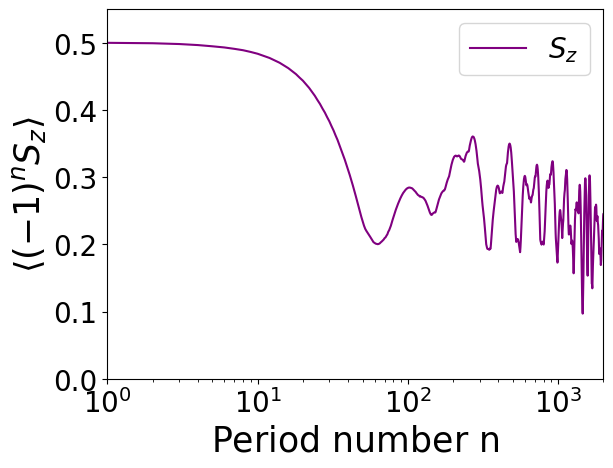

PyObject Text(48.000000000000014, 0.5, '$\\langle (-1)^{n} S_z \\rangle$')

In [35]:
fig, ax = PyPlot.subplots()
ax[:plot](timesa, (szcent/10), label = L"$S_z$",color="purple")
ax[:legend](loc="best", fontsize=20)
ax[:locator_params](axis ="y", nbins=10)
ax[:locator_params](axis ="x", nbins=4)
ax[:tick_params](axis ="both", labelsize=20)
ax[:set_ylim]([0,0.55])
ax[:set_xlim]([1,ttotal])
ax[:set_xscale]("log")
#PyPlot.plot(time,)
PyPlot.xlabel(L"$\rm{Period}\,\, \rm{number}\,\, n$",fontsize=25)
PyPlot.ylabel(L"$\langle (-1)^{n} S_z \rangle$",fontsize=25)

#PyPlot.ylabel(latexstring("\$\\lambda=\$ $(eigenvalue_approx[1])")
#Pyplot.set_title(r"$\langle (-1)^{n}\frac{1}{N-1}\sum_{k=6}^{8}S_{z,k} \rangle$")
#\langle (-1)^{n}\fr